In [2]:
# Imports
import contextily as cx 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Explore options for creating spatial weights matrix

### Read and prepare data

In [3]:
# Read data from .csv file, drop apartments without location data
df = pd.read_csv("data/20-04-23.csv")
df = df[df.longitude != 0.0]
df.head()

,id,rooms,area,rent,latitude,longitude
0,5248131,1,38,5216,55.652406,12.512200
1,5275700,1,37,7900,55.671065,12.501394
2,5211187,1,40,6300,55.649554,12.551497
3,5263181,3,73,11000,55.663465,12.542260
4,5249720,3,73,11000,55.663465,12.542260


In [4]:
# Add column for normalised rent = rent / area
df["norm_rent"] = round(df.rent / df.area, 2)
df.head()

,id,rooms,area,rent,latitude,longitude,norm_rent
0,5248131,1,38,5216,55.652406,12.512200,137.26
1,5275700,1,37,7900,55.671065,12.501394,213.51
2,5211187,1,40,6300,55.649554,12.551497,157.50
3,5263181,3,73,11000,55.663465,12.542260,150.68
4,5249720,3,73,11000,55.663465,12.542260,150.68


In [5]:
# Create GeoDataFrame from Pandas DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
gdf.head()

,id,rooms,area,rent,latitude,longitude,norm_rent,geometry
0,5248131,1,38,5216,55.652406,12.512200,137.26,POINT (12.51220 55.65241)
1,5275700,1,37,7900,55.671065,12.501394,213.51,POINT (12.50139 55.67106)
2,5211187,1,40,6300,55.649554,12.551497,157.50,POINT (12.55150 55.64955)
3,5263181,3,73,11000,55.663465,12.542260,150.68,POINT (12.54226 55.66347)
4,5249720,3,73,11000,55.663465,12.542260,150.68,POINT (12.54226 55.66347)


/tmp/ipykernel_258/2503849642.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("cool").copy()
  cmap.set_under('red')


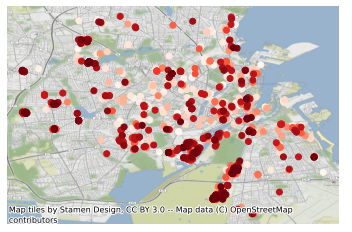

In [6]:
# Visualise 
ax = gdf.plot(c=gdf["rent"], cmap='Reds', legend=True)
ax.set_axis_off()
cx.add_basemap(ax, crs=gdf.crs)
cmap = plt.cm.get_cmap('cool')
cmap.set_under('red')

### Create distance based spatial weight matrix